In [22]:
#Checkpoint 1: Data Cleaning 1

#Importing companies file
import pandas as pd

companies = pd.read_csv("companies.txt", sep="\t", encoding = "ISO-8859-1")
companies = companies.loc[companies['name'] != 0]
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [23]:
#rounds2 companies file
rounds2 = pd.read_csv("rounds2.csv", sep=",", encoding = "ISO-8859-1")
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [24]:
#Table 1.1 Q1
#finding unique observations
companies.name.nunique()

66102

In [25]:
#Table 1.1 Q2
#finding unique observations
rounds2.company_permalink.nunique()

90247

In [26]:
#Table 1.1 Q4
#Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N.
companies['permalink'] = companies['permalink'].str.replace(" ","")
rounds2['company_permalink'] = rounds2['company_permalink'].str.replace(" ","")
sample = rounds2.company_permalink.str.lower().isin(companies.permalink.str.lower()).astype(int)
sample = sample.to_frame()
sample.names = ["A","B"]
pd.value_counts(sample['company_permalink'].values, sort=False)

C:\Users\91801\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


0         7
1    114942
dtype: int64

In [27]:
#Table 1.1 Q5
#Creation of master_frame by joining companies and rounds2

master_frame = pd.merge(left=companies,right=rounds2, left_on= companies.permalink.str.lower(), right_on=rounds2.company_permalink.str.lower())
master_frame = master_frame.drop(columns=['permalink', 'company_permalink'])
master_frame = master_frame.loc[master_frame['status'] != "closed"]
master_frame

,key_0,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
6,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
9,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0


In [28]:
#Checkpoint 2: Funding Type Analysis

master_frame = master_frame.fillna(0)
master_frame['USD_M'] = master_frame.raised_amount_usd / 1000000

#Table 2.1 Q1, Q2, Q3, Q4
#Finding suitable investment type

inv_type = master_frame.groupby(['funding_round_type'])['USD_M'].mean()
inv_type = inv_type.to_frame()
inv_type

,USD_M
funding_round_type,
angel,0.784698
convertible_note,1.177876
debt_financing,17.207285
equity_crowdfunding,0.189465
grant,4.009656
non_equity_assistance,0.150503
post_ipo_debt,174.609328
post_ipo_equity,82.924526
private_equity,64.902477


In [29]:
#Checkpoint 3: Country Analysis

#Observations with Venture as investment type
venture = master_frame.loc[master_frame['funding_round_type'] == "venture"]
venture = venture.loc[venture['country_code'] != 0]

#Table 3.1 Q1, Q2, Q3

top = venture.groupby(['country_code'])['USD_M'].sum().sort_values(ascending=False)
top9 = top.head(9)
top9 = top9.to_frame()
top9

,USD_M
country_code,
USA,399935.149987
CHN,39101.773502
GBR,18241.343570
IND,14050.603718
CAN,8825.487216
FRA,6775.044017
ISR,6503.020916
DEU,6061.140919
JPN,3242.031955


In [30]:
#Checkpoint 3: Country Analysis

#Venture investment observations across the top 3 identified english speaking countries
country1 = ["USA", "GBR", "IND"]
venturet3 = venture[venture.country_code.isin(country1)]
venturet3 = venturet3.loc[venture['category_list'] != 0]

#Checkpoint 4: Sector Analysis 1

#Identifying primary sector for category list
venturet3['category_old'] = venturet3.category_list
venturet3['primary_cate'] =  venturet3['category_list'].str.split("|")
venturet3.loc[:, 'category_list'] = venturet3.primary_cate.map(lambda x: x[0])
venturet3 = venturet3.drop(columns=['primary_cate'])
venturet3.head()

,key_0,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,USD_M,category_old
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,10.0,Media
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,0.0,0.0,Application Platforms|Real Time|Social Network...
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,0,24-07-2014,0.0,0.0,Software
10,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,20.0,Analytics
11,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,0,03-01-2013,1700000.0,1.7,Analytics


In [31]:
#Checkpoint 4: Sector Analysis 1

#Importing mapping file
mapping = pd.read_csv("mapping.csv", sep=",", encoding = "ISO-8859-1")
mapping.head()
mapping_column = mapping.loc[:, 'Automotive & Sports':'Social, Finance, Analytics, Advertising']

#Creating the primary sector to main sector mapping readable from the binary raw data
mapping ['prime'] = 1
mapping['main_sector'] = mapping_column.apply(lambda row: row.isin(mapping['prime']).idxmax(), axis=1)
mapping.drop(mapping.columns[1:-1], axis=1, inplace=True)
mapping.head()

,category_list,main_sector
0,NaN,Blanks
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
4,Accounting,"Social, Finance, Analytics, Advertising"


In [32]:
#Collating all the dataframes
#Incorporating the primary and main sector in one single dataframe

collated = pd.merge(venturet3,mapping,on=['category_list', 'category_list'])
collated = collated.rename(columns = {"category_list": "primary_sector", "category_old":"category_list"}) 
collated.head()

,key_0,name,homepage_url,primary_sector,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,USD_M,category_list,main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,10.0,Media,Entertainment
1,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,0,06-10-2015,15000000.0,15.0,Media|News|Publishing|Soccer|Sports,Entertainment
2,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,0,07-05-2013,5800000.0,5.8,Media|News|Publishing|Soccer|Sports,Entertainment
3,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,0,26-03-2014,18000000.0,18.0,Media|News|Publishing|Soccer|Sports,Entertainment
4,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,0,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,5.0,Media,Entertainment


In [33]:
#Checkpoint 5: Sector Analysis 2

#Segregated the table into D1, D2 and D3
D1 = collated.loc[collated['country_code'] == "USA"]
D1 = D1[(D1['raised_amount_usd'] >= 5000000) & (D1['raised_amount_usd'] <= 15000000)]
D2 = collated.loc[collated['country_code'] == "GBR"]
D2 = D2[(D2['raised_amount_usd'] >= 5000000) & (D2['raised_amount_usd'] <= 15000000)]
D3 = collated.loc[collated['country_code'] == "IND"]
D3 = D3[(D3['raised_amount_usd'] >= 5000000) & (D3['raised_amount_usd'] <= 15000000)]

D1['count_investment'] = D1.groupby('main_sector')['main_sector'].transform('count')
D2['count_investment'] = D2.groupby('main_sector')['main_sector'].transform('count')
D3['count_investment'] = D3.groupby('main_sector')['main_sector'].transform('count')


D1['sum_investment'] = D1['raised_amount_usd'].groupby(D1['main_sector']).transform('sum')
D1['sum_inv_USD$M'] = D1.sum_investment / 1000000
D2['sum_investment'] = D2['raised_amount_usd'].groupby(D2['main_sector']).transform('sum')
D2['sum_inv_USD$M'] = D2.sum_investment / 1000000
D3['sum_investment'] = D3['raised_amount_usd'].groupby(D3['main_sector']).transform('sum')
D3['sum_inv_USD$M'] = D3.sum_investment / 1000000

D1.head()

,key_0,name,homepage_url,primary_sector,status,country_code,state_code,region,city,founded_at,...,funding_round_type,funding_round_code,funded_at,raised_amount_usd,USD_M,category_list,main_sector,count_investment,sum_investment,sum_inv_USD$M
4,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,0,...,venture,A,06-08-2014,5000000.0,5.0,Media,Entertainment,520,4.503765e+09,4503.764912
14,/organization/chefs-feed,ChefsFeed,http://www.chefsfeed.com,Media,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,...,venture,A,26-02-2015,5000000.0,5.0,Media|Mobile|Restaurants|Technology,Entertainment,520,4.503765e+09,4503.764912
18,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media,acquired,USA,NY,New York City,New York,09-05-2005,...,venture,A,01-08-2006,5000000.0,5.0,Media|News|Publishing,Entertainment,520,4.503765e+09,4503.764912
19,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media,acquired,USA,NY,New York City,New York,09-05-2005,...,venture,B,01-09-2007,5000000.0,5.0,Media|News|Publishing,Entertainment,520,4.503765e+09,4503.764912
24,/organization/mediabong,MEDIABONG,http://www.mediabong.com,Media,operating,USA,NY,New York City,New York,30-05-2011,...,venture,B,13-05-2015,5000000.0,5.0,Media|Semantic Search|Video,Entertainment,520,4.503765e+09,4503.764912


In [34]:
D2.head()

,key_0,name,homepage_url,primary_sector,status,country_code,state_code,region,city,founded_at,...,funding_round_type,funding_round_code,funded_at,raised_amount_usd,USD_M,category_list,main_sector,count_investment,sum_investment,sum_inv_USD$M
1,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,...,venture,0,06-10-2015,15000000.0,15.00,Media|News|Publishing|Soccer|Sports,Entertainment,51,442241059.0,442.241059
2,/organization/90min,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,...,venture,0,07-05-2013,5800000.0,5.80,Media|News|Publishing|Soccer|Sports,Entertainment,51,442241059.0,442.241059
49,/organization/common-interest-communities,Common Interest Communities,http://commoninterestcommunities.com/,Application Platforms,operating,GBR,H9,London,London,0,...,venture,0,09-07-2014,10000000.0,10.00,Application Platforms|Internet|Software|Startups,"News, Search and Messaging",66,558500705.0,558.500705
55,/organization/geospock-ltd-,GeoSpock Ltd.,http://www.geospock.com,Application Platforms,operating,GBR,C3,London,Cambridge,01-01-2013,...,venture,0,01-10-2014,5460000.0,5.46,Application Platforms|Databases|Real Time,"News, Search and Messaging",66,558500705.0,558.500705
56,/organization/geospock-ltd-,GeoSpock Ltd.,http://www.geospock.com,Application Platforms,operating,GBR,C3,London,Cambridge,01-01-2013,...,venture,A,05-10-2015,5400000.0,5.40,Application Platforms|Databases|Real Time,"News, Search and Messaging",66,558500705.0,558.500705


In [35]:
D3.head()

,key_0,name,homepage_url,primary_sector,status,country_code,state_code,region,city,founded_at,...,funding_round_type,funding_round_code,funded_at,raised_amount_usd,USD_M,category_list,main_sector,count_investment,sum_investment,sum_inv_USD$M
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,0,...,venture,B,05-01-2015,10000000.0,10.0,Media,Entertainment,32,272080000.0,272.080000
222,/organization/ameyo,Ameyo,http://www.ameyo.com/,Software,operating,IND,10,New Delhi,Gurgaon,01-01-2003,...,venture,A,03-07-2015,5000000.0,5.0,Software,Others,102,934289507.0,934.289507
250,/organization/applabs,AppLabs,http://www.applabs.com,Software,acquired,IND,2,Hyderabad,Hyderabad,01-01-2001,...,venture,0,29-06-2006,10000000.0,10.0,Software,Others,102,934289507.0,934.289507
262,/organization/appsdaily-solutions,Appsdaily Solutions,http://appsdailyworld.com/daily/index.jsp,Software,operating,IND,16,Mumbai,Mumbai,01-01-2008,...,venture,B,10-04-2014,5000000.0,5.0,Software,Others,102,934289507.0,934.289507
558,/organization/canvera-digital-technologies,Canvera Digital Technologies,http://canvera.com,Software,operating,IND,19,Bangalore,Bangalore,01-01-2007,...,venture,0,29-08-2012,6500000.0,6.5,Software,Others,102,934289507.0,934.289507


In [36]:
#Table 5.1 Q1 - Q8

c1a = D1.groupby(['main_sector'])['funding_round_type'].count().sort_values(ascending=False)
c1a = c1a.to_frame()
count_c1a = c1a['funding_round_type'].sum()

c2a = D2.groupby(['main_sector'])['funding_round_type'].count().sort_values(ascending=False)
c2a = c2a.to_frame()
count_c2a = c2a['funding_round_type'].sum()

c3a = D3.groupby(['main_sector'])['funding_round_type'].count().sort_values(ascending=False)
c3a = c3a.to_frame()
count_c3a = c3a['funding_round_type'].sum()


c1b = D1.groupby(['main_sector'])['USD_M'].sum().sort_values(ascending=False)
c1b = c1b.to_frame()
sum_c1b = c1b['USD_M'].sum()

c2b = D2.groupby(['main_sector'])['USD_M'].sum().sort_values(ascending=False)
c2b = c2b.to_frame()
sum_c2b = c2b['USD_M'].sum()

c3b = D3.groupby(['main_sector'])['USD_M'].sum().sort_values(ascending=False)
c3b = c3b.to_frame()
sum_c3b = c3b['USD_M'].sum()

print(count_c1a,count_c2a,count_c3a)
print(sum_c1b,sum_c2b,sum_c3b)

#Finding top sectors across the top 3 countries
print(c1a.head(3))
print(c2a.head(3))
print(c3a.head(3))


10404 542 287
93176.22253399997 4728.734985000001 2569.667552
                                         funding_round_type
main_sector                                                
Others                                                 2732
Cleantech / Semiconductors                             2145
Social, Finance, Analytics, Advertising                1813
                                         funding_round_type
main_sector                                                
Others                                                  137
Cleantech / Semiconductors                              114
Social, Finance, Analytics, Advertising                  95
                                         funding_round_type
main_sector                                                
Others                                                  102
News, Search and Messaging                               49
Social, Finance, Analytics, Advertising                  32


In [37]:
#Table 5.1 Q9, Q10

D1_1a = D1.loc[D1['main_sector'] == "Others"]
D1_1b = D1.loc[D1['main_sector'] == "Cleantech / Semiconductors"]
com1_c1 = D1_1a.groupby(['name'])['USD_M'].sum().sort_values(ascending=False)
com2_c1 = D1_1b.groupby(['name'])['USD_M'].sum().sort_values(ascending=False)
#D1_1c = D1.loc[D1['main_sector'] == "Social, Finance, Analytics, Advertising"] 

D2_1a = D2.loc[D2['main_sector'] == "Others"]
D2_1b = D2.loc[D2['main_sector'] == "Cleantech / Semiconductors"]
com1_c2 = D2_1a.groupby(['name'])['USD_M'].sum().sort_values(ascending=False)
com2_c2 = D2_1b.groupby(['name'])['USD_M'].sum().sort_values(ascending=False)
#D2_1c = D1.loc[D1['main_sector'] == "Social, Finance, Analytics, Advertising"]

D3_1a = D3.loc[D3['main_sector'] == "Others"]
D3_1b = D3.loc[D3['main_sector'] == "News, Search and Messaging"]
com1_c3 = D3_1a.groupby(['name'])['USD_M'].sum().sort_values(ascending=False)
com2_c3 = D3_1b.groupby(['name'])['USD_M'].sum().sort_values(ascending=False)
#D3_1c = D1.loc[D1['main_sector'] == "Social, Finance, Analytics, Advertising"]

#Identifying companies
print(com1_c1.head(1), com2_c1.head(1))
print()
print(com1_c2.head(1), com2_c2.head(1))
print()
print(com1_c3.head(1), com2_c3.head(1))

name
Virtustream    64.3
Name: USD_M, dtype: float64 name
Biodesix    75.3
Name: USD_M, dtype: float64

name
Electric Cloud    37.0
Name: USD_M, dtype: float64 name
EUSA Pharma    35.6
Name: USD_M, dtype: float64

name
FirstCry.com    39.0
Name: USD_M, dtype: float64 name
GupShup    33.0
Name: USD_M, dtype: float64


In [38]:
#Checkpoint 6: Plots

total_USDM = master_frame["USD_M"].sum()
total_USDM

check = master_frame['funding_round_type'].isin(["venture","seed","private_equity"])
frac_inv = master_frame[check]

fplot1 = frac_inv.groupby(['funding_round_type'])['USD_M'].sum().sort_values(ascending=False)
fplot1 = fplot1.to_frame()
fplot1["fraction"] = fplot1["USD_M"] / total_USDM
fplot1["fraction"] = fplot1['fraction'].map(lambda n: '{:,.2%}'.format(n))
average = frac_inv.groupby(['funding_round_type'])['USD_M'].mean() 
print(fplot1)
average = average.to_frame()
print()
print(average)


                            USD_M fraction
funding_round_type                        
venture             554822.839010   59.24%
private_equity      136489.908405   14.57%
seed                 16063.598753    1.72%

                        USD_M
funding_round_type           
private_equity      64.902477
seed                 0.575736
venture             10.781214


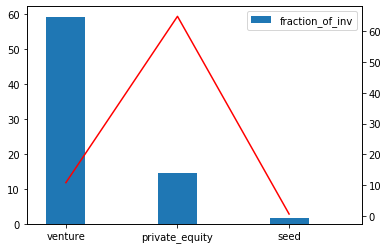

In [39]:
#Chart 1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

width = .35 # width of a bar

m1_t = pd.DataFrame({
 'fraction_of_inv' : [59.24,14.57,1.72],
 'average_inv' : [10.781214,64.902477, 0.575736]})

m1_t[['fraction_of_inv']].plot(kind='bar', width = width)
m1_t['average_inv'].plot(secondary_y=True)

ax = plt.gca()
ax.get_lines()[0].set_color("red")
plt.xlim([-width, len(m1_t['fraction_of_inv'])-width])
ax.set_xticklabels(('venture', 'private_equity', 'seed'))

plt.show()

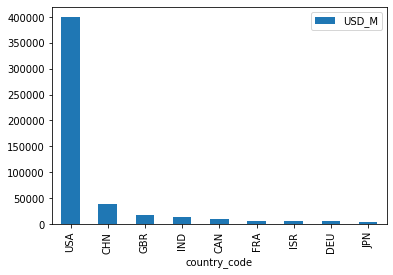

In [40]:
#Chart 2
top9.plot.bar() 

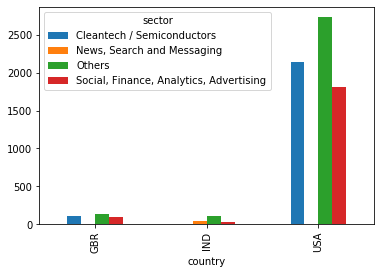

In [41]:
#Chart 3

import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame([['Others','USA',2732],['Others','GBR',137],['Others','IND',103],['Cleantech / Semiconductors','USA',2145],
                   ['Cleantech / Semiconductors','GBR',114],['Social, Finance, Analytics, Advertising','USA',1813],['Social, Finance, Analytics, Advertising','GBR',95],
                  ['Social, Finance, Analytics, Advertising','IND',32], ['News, Search and Messaging','IND',49]],columns=['sector','country','count'])


df
df.pivot("country", "sector", "count").plot(kind='bar')

plt.show()